# 1.Install and Import Dependencies

In [1]:
%pip install torch==1.8.2+cu111 torchvision==0.9.2+cu111 torchaudio===0.8.2 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html
Note: you may need to restart the kernel to use updated packages.


In [2]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [3]:
!cd yolov5 & pip install -r requirements.txt

In [1]:
import torch #will be used to load the yolo model and make detections
from matplotlib import pyplot as plt #will be used for visualizing images
import numpy as np # will be used for array transformation
import cv2 # helps access the camera and render feeds

 if more than 15 vehicles add 9 sec time to green signal
 if more than 10 vehicles add 7 sec time to green signal

# 2.Load Model

In [4]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\Amey Shiwal/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-4-11 torch 1.8.2+cu111 CUDA:0 (NVIDIA GeForce GTX 1650 Ti, 4096MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.5 GFLOPs
Adding AutoShape... 


In [7]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
           

# 3.Make Detections with Images

In [8]:
img = "https://dz01iyojmxk8t.cloudfront.net/wp-content/uploads/2017/12/16225639/Highway1.jpg"
img2 = "https://daily.jstor.org/wp-content/uploads/2017/12/traffic_jam_1050x700.jpg"
img3 = "https://ychef.files.bbci.co.uk/976x549/p020rgbg.jpg"
img4 = "https://cdn.autoportal.com/bp-v3/img/models/a5/4/honda-cb-shine-1464785913.jpg"
#"https://ichef.bbci.co.uk/news/624/mcs/media/images/78649000/jpg/_78649502_auto.jpg"
#"https://dz01iyojmxk8t.cloudfront.net/wp-content/uploads/2017/12/16225639/Highway1.jpg"
#"https://media.zigcdn.com/media/content/2019/Nov/wrapup_560x420.jpg"

In [9]:
results = model(img)
results.print()
results2 = model(img2)
results3 = model(img3)
results4 = model(img4)
print(len(results.pandas().xyxy[0]),len(results2.pandas().xyxy[0]),len(results3.pandas().xyxy[0]),len(results4.pandas().xyxy[0]))
# if len(results.pandas().xyxy[0]) < len(results2.pandas().xyxy[0]):
#     print("Signal 1: Red, Signal 2: Green")

image 1/1: 454x643 14 Cars
Speed: 87.7ms pre-process, 156.6ms inference, 3.5ms NMS per image at shape (1, 3, 480, 640)
14 54 29 3


In [5]:
Cam1 = len(results.pandas().xyxy[0])
Cam2 = len(results2.pandas().xyxy[0])
Cam3 = len(results3.pandas().xyxy[0])
Cam4 = len(results4.pandas().xyxy[0])

if(Cam1 > Cam2 and Cam1 > Cam3 and Cam1 > Cam4):
    print("Signal1:Green\nSignal2:Red\nSignal3:Red\nSignal4:Red")

elif(Cam2 > Cam1 and Cam2 > Cam3 and Cam2 > Cam4):
    print("Signal1:Red\nSignal2:Green\nSignal3:Red\nSignal4:Red")

elif(Cam3 > Cam2 and Cam3 > Cam2 and Cam3 > Cam4):
    print("Signal1:Red\nSignal2:Red\nSignal3:Green\nSignal4:Red")

elif(Cam4 > Cam2 and Cam4 > Cam2 and Cam4 > Cam1):
    print("Signal1:Red\nSignal2:Red\nSignal3:Red\nSignal4:Green")

Signal1:Red
Signal2:Green
Signal3:Red
Signal4:Red


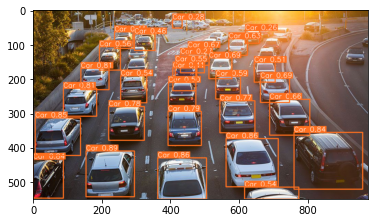

In [10]:
%matplotlib inline
plt.imshow(np.squeeze(results3.render()))
plt.show()
#results.pandas().xyxy[0].to_json(orient="records")
# print(str(a).split())

In [12]:
results3.show()
# results.pandas().xyxy[0]

In [28]:
#details = results.pandas().xyxy[0].apply(lambda x: True if x['name']== "Bike" else False, axis = 1)
len(results.pandas().xyxy[0])

14

# 4.Training the Model

In [18]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 20 --data data.yaml --weights yolov5s.pt --workers 2 

Weights & Biases: run 'pip install wandb' to automatically track and visualize YOLOv5  runs (RECOMMENDED)


train: weights=yolov5s.pt, cfg=, data=data.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
From https://github.com/ultralytics/yolov5
   7a2a118..3bb233a  master              -> origin/master
   d1e2938..fa2c16a  classifier          -> origin/classifier
   4ba656b..75078b0  test/conv_reduction -> origin/test/conv_reduction
 * [new branch]      test/frelu          -> origin/test/frelu
 * [new branch]      test/frelu2         -> origin/test/frelu2
 * [new branch]      test/smoothing      -> origin/test/smoothing
 * [new bran

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='C:/Users/Amey Shiwal/Downloads/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\Amey Shiwal/.cache\torch\hub\master.zip
YOLOv5  2022-4-26 torch 1.8.2+cu111 CUDA:0 (NVIDIA GeForce GTX 1650 Ti, 4096MiB)

Fusing layers... 
Model summary: 213 layers, 7026307 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [8]:
cap = cv2.VideoCapture("video/traffic3.mp4")
while cap.isOpened():
    ret,frame = cap.read()

    # Make Detections
    results = model(frame)
    font = cv2.FONT_HERSHEY_SIMPLEX
    text = "Total obj: " + str(len(results.pandas().xyxy[0]))
    # Use putText() method for
    # inserting text on video
    cv2.putText(frame, 
                text, 
                (50, 50), 
                font, 1, 
                (0, 0, 0), 
                2, 
                cv2.LINE_4)
    cv2.imshow('YOLO',np.squeeze(results.render()))
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [10]:
import numpy as np
import cv2

#capture the webcam
vid1 = cv2.VideoCapture("video/traffic4.mp4")
vid2 = cv2.VideoCapture("video/traffic3.mp4")
#vid3 = cv2.VideoCapture('http://192.168.2.2:5000/video')  #ipwebcam address 


while True:                               #while true, read the camera
    ret , frame = vid1.read()
    results = model(frame)
    font = cv2.FONT_HERSHEY_SIMPLEX
    text = "Total obj: " + str(len(results.pandas().xyxy[0]))
    # Use putText() method for
    # inserting text on video
    cv2.putText(frame, 
                text, 
                (50, 50), 
                font, 1, 
                (0, 0, 0), 
                2, 
                cv2.LINE_4)
    re1 , frame1 = vid2.read()
    results1 = model(frame1)
    text2 = "Total obj: " + str(len(results1.pandas().xyxy[0]))
    # Use putText() method for
    # inserting text on video
    cv2.putText(frame1, 
                text2, 
                (50, 50), 
                font, 1, 
                (0, 0, 0), 
                2, 
                cv2.LINE_4)
    #ret2 , frame2 = vid3.read()
    compareVideo(results,results1)
    if (ret):
        cv2.imshow('Cam1',np.squeeze(results.render()))          #frame with name and variable of the camera 
        cv2.imshow('YOLO',np.squeeze(results1.render()))
        #cv2.imshow('cam3',frame2)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

vid1.release()
vid2.release()
cv2.destroyAllWindows()
#vid3.release()

{'Signal1': 'Red', 'Signal2': 'Green'}
{'Signal1': 'Red', 'Signal2': 'Green'}
{'Signal1': 'Red', 'Signal2': 'Green'}
{'Signal1': 'Red', 'Signal2': 'Green'}
{'Signal1': 'Red', 'Signal2': 'Green'}
{'Signal1': 'Red', 'Signal2': 'Green'}
{'Signal1': 'Red', 'Signal2': 'Green'}
{'Signal1': 'Red', 'Signal2': 'Green'}
{'Signal1': 'Red', 'Signal2': 'Green'}
{'Signal1': 'Red', 'Signal2': 'Green'}
{'Signal1': 'Red', 'Signal2': 'Green'}
{'Signal1': 'Red', 'Signal2': 'Green'}
{'Signal1': 'Red', 'Signal2': 'Green'}
{'Signal1': 'Red', 'Signal2': 'Green'}
{'Signal1': 'Red', 'Signal2': 'Green'}
{'Signal1': 'Red', 'Signal2': 'Green'}
{'Signal1': 'Red', 'Signal2': 'Green'}
{'Signal1': 'Red', 'Signal2': 'Green'}
{'Signal1': 'Red', 'Signal2': 'Green'}
{'Signal1': 'Red', 'Signal2': 'Green'}
{'Signal1': 'Red', 'Signal2': 'Green'}
{'Signal1': 'Red', 'Signal2': 'Green'}
{'Signal1': 'Red', 'Signal2': 'Green'}
{'Signal1': 'Red', 'Signal2': 'Green'}
{'Signal1': 'Red', 'Signal2': 'Green'}
{'Signal1': 'Red', 'Signa

In [9]:
def compareVideo(results,results1):
    signalColor = {
    "Signal1":"Green",
    "Signal2":"Red",}

    Cam1 = len(results.pandas().xyxy[0])
    Cam2 = len(results1.pandas().xyxy[0])

    if(Cam1 > Cam2):
        print(signalColor)

    elif(Cam2 > Cam1):
        signalColor["Signal1"]="Red"
        signalColor["Signal2"]="Green"
        print(signalColor)

In [31]:
def DetectVideo(videoCap):
    cap = cv2.VideoCapture(videoCap)
    while cap.isOpened():
        ret,frame = cap.read()

        # Make Detections
        results = model(frame)
        
        cv2.imshow('YOLO',np.squeeze(results.render()))
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [32]:
DetectVideo("video/traffic4.mp4")
DetectVideo("video/traffic3.mp4")